<a href="https://colab.research.google.com/github/emrahyurtlu/deep-learning/blob/main/CMPE430/cmpe430_lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CMPE 430 – Fundamentals of Deep Learning - Lab Exam**

2021-2022, Fall

Date: December 30, 2021

Instructor : Assoc. Prof. Dr. Murat Karakaya

Assistant : Cansen Çağlayan


Student's Name Surname :

Student ID :

#**Dataset : A Multi-Class Text Dataset** 


$\color{red}{\text{Download the dataset to your computer using the link in the Moodle, then upload it to the Colab Files (Dosyalar) section.}}$

**Twitter US Airline Sentiment:** Twitter data on US airlines dating back to February of 2015 that’s already been classified based on sentiment class *(positive, neutral, negative)*. This text classification dataset contains roughly 15,000 tweets pertaining to about six different commercial airlines. 

In [ ]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.utils import plot_model

#**Load and explore the data**

In [ ]:
data = pd.read_csv("twitter_airline_sentiment_dataset.csv")

In [ ]:
data.head(20)

,airline_sentiment,text
0,negative,@AmericanAir on Feb. 15th your rep gave me the...
1,negative,@JetBlue I would like to send an email to Lost...
2,negative,@USAirways But nope! Apparently this is the w...
3,positive,@VirginAmerica and again! Another rep kicked b...
4,positive,I ❤️ flying @VirginAmerica. ☺️👍
5,positive,@SouthwestAir shhhh i don't want something els...
6,negative,@USAirways Our flight was Cancelled Flightled ...
7,positive,@JetBlue I did...#FlyFi worked well and was fr...
8,negative,@AmericanAir I can't work with them if the cal...
9,positive,@united thanks


In [ ]:
data.tail(20)

,airline_sentiment,text
6874,positive,@JetBlue thanks!
6875,neutral,@JetBlue okay so anything using contactless EM...
6876,negative,@united no way one person is working entire se...
6877,positive,@united Sure did! Only waited about 15min. Yay!
6878,negative,@AmericanAir you have Cancelled Flightled my f...
6879,positive,"@united That made me so mad, but then I called..."
6880,positive,@JetBlue your customer service agent Bonnie is...
6881,neutral,@JetBlue hi I flew with your airline once in A...
6882,positive,@SouthwestAir All's well. I got comped with mu...
6883,neutral,@SouthwestAir I will dm you now


In [ ]:
data.describe()

,airline_sentiment,text
count,6894,6894
unique,3,6880
top,negative,@AmericanAir I'd like to apologize to the gate...
freq,2298,2


Note : Dataset is balanced.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Text sentiment types')

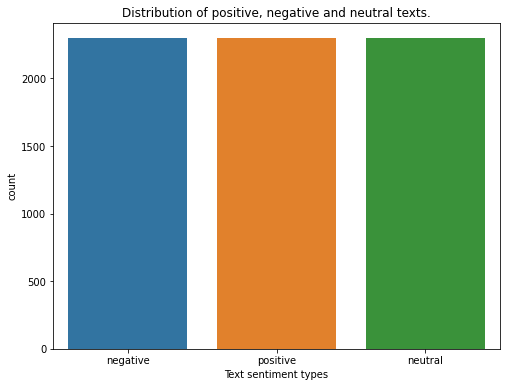

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data.airline_sentiment)
plt.title('Distribution of positive, negative and neutral texts.')
plt.xlabel('Text sentiment types')

In [ ]:
 #Number of reviews in each class 
data['airline_sentiment'].value_counts()

negative    2298
positive    2298
neutral     2298
Name: airline_sentiment, dtype: int64

In [ ]:
#Total number of reviews is 6894.
data['text'].shape

(6894,)

# **$\color{red}{\text{EXAM STARTS AT THIS POINT !!!}}$**

## There may some **logical mistakes (not typo)** or **missing operations/parts** in the works done after this point. 

## There are two parts of the exam:

###1. Find the **3** most basic of these mistakes and explain them by concept. 

###2. Then write the best version of the code by making changes to it. Fix logical mistakes and complete the missing operations/parts. 

# **You can add whatever you think is necessary. Also you can change any part.**

###3. Whoever gets the highest achievement(accuracy) from the model he/she wrote will receive a **5 point bonus**.

In [ ]:
maxlen=50 #Maximum sequence size

Giving numbers to the labels (positive, negative and neutral)

negative -> 0

neutral -> 1

positive -> 2

In [ ]:
data["airline_sentiment"] = data["airline_sentiment"].astype('category') #By converting an existing Series or column to a category dtype
data.dtypes

airline_sentiment    category
text                   object
dtype: object

In [ ]:
data["sentiment_id"] = data["airline_sentiment"].cat.codes #Adding sentiment_id column.
data.head(20)

,airline_sentiment,text,sentiment_id
0,negative,@AmericanAir on Feb. 15th your rep gave me the...,0
1,negative,@JetBlue I would like to send an email to Lost...,0
2,negative,@USAirways But nope! Apparently this is the w...,0
3,positive,@VirginAmerica and again! Another rep kicked b...,2
4,positive,I ❤️ flying @VirginAmerica. ☺️👍,2
5,positive,@SouthwestAir shhhh i don't want something els...,2
6,negative,@USAirways Our flight was Cancelled Flightled ...,0
7,positive,@JetBlue I did...#FlyFi worked well and was fr...,2
8,negative,@AmericanAir I can't work with them if the cal...,0
9,positive,@united thanks,2


In [ ]:
#Assigning variables to the columns.
text = data['text']
airline_sentiment = data['airline_sentiment']
sentiment_id = data['sentiment_id']

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    standardize='lower_and_strip_punctuation', #to make all text lower case and remove the punctuation
    output_mode='int',
    output_sequence_length=maxlen,
)

In [ ]:
vectorize_layer.adapt(text) #Each word will be assigned an integer value

In [ ]:
vocab = vectorize_layer.get_vocabulary() #To get words back from token indices

**$\color{red}{\text{Add 1 :}}$** Print the first 20 words and the integer values that represent these words.

In [ ]:
#Write your code here

In [ ]:
#Train-Test Split Operation
train_text,test_text,train_sentiment,test_sentiment = train_test_split(text,airline_sentiment,test_size=0.5,random_state=22)

In [ ]:
vectorized_train_text = vectorize_layer(train_text)

**$\color{red}{\text{Add 2 :}}$** Print the first element of vectorized_train_text.

In [ ]:
#Write your code here

In [ ]:
vectorized_test_text = vectorize_layer(test_text)

**$\color{red}{\text{Add 3 :}}$** Print the first element of vectorized_test_text.

In [ ]:
#Write your code here

In [ ]:
#Creating the validation dataset

validation_text = vectorized_train_text[:3000]
train_text_partial = train_text[3000:]

validation_sentiment = test_sentiment[:500]
train_sentiment_partial = test_sentiment[500:]

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_sentiment_id = to_categorical(validation_sentiment)

one_hot_test_sentiment_id = to_categorical(train_sentiment_partial)

In [ ]:
#Model architecture
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(150,)))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(1, activation='softmax'))

**$\color{red}{\text{Add 4 :}}$** Print the Summary of model.

In [ ]:
#Write your code here

**$\color{red}{\text{Add 5 :}}$** Plot the Model.

In [ ]:
#Write your code here

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
opt = SGD(learning_rate=0.000001)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=opt ,metrics=['accuracy'])

In [ ]:
history = model.fit(train_text,
                    one_hot_test_sentiment_id,
                    epochs=2,
                    batch_size=256,
                    validation_data=(test_text, airline_sentiment))

**$\color{red}{\text{Add 6:}}$** Checkt the history dictionary elements, print them.

In [ ]:
#Write your code here

In [ ]:
test_loss,test_acc = model.evaluate(train_text_partial,one_hot_test_sentiment_id)

In [ ]:
#Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **PART 1** EXPLAIN THE 3 LOGICAL MISTAKES :

**Why are they wrong and how to fix them?**

1. 



2.  


3. 


##**PART 2** FIX THE MISTAKES AND WRITE THE MISSING PARTS ON THE CODE
